In [1]:
%load_ext rpy2.ipython

# Problem 1: The Command Line

SSH into your instance. 

You will find a file located at $HOME/not-your-folder/2018_padro_nacionalitat_per_sexe.csv 

Your job is to create a new folder at $HOME/this-is-the-one, and move the csv file into that new folder

# Problem 2: Plotting in R

In [2]:
%%R

library(tidyverse)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

  warnings.warn(x, RRuntimeWarning)


In [3]:
%%R
#Read the file '2018_padro_nacionalitat_per_sexe.csv' from the new location, using read_csv
# put the resulting Tibble into a variable called 'barris'

barris <- read_csv('2018_padro_nacionalitat_per_sexe.csv')

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Parsed with column specification:
cols(
  Any = col_double(),
  Codi_Districte = col_double(),
  Nom_Districte = col_character(),
  Codi_Barri = col_double(),
  Nom_Barri = col_character(),
  Sexe = col_character(),
  Nacionalitat = col_character(),
  Nombre = col_double()
)

  warnings.warn(x, RRuntimeWarning)


In [4]:
%%R

# Let's manually convert a few columns into factors. 
barris <- barris %>% mutate(Nom_Barri = parse_factor(Nom_Barri), 
                  Sexe = parse_factor(Sexe),
                  Nacionalitat = parse_factor(Nacionalitat))


In [5]:
%%R

# We want to explore the neighborhood referred to as 'el Poblenou', in the variable
# 'Nom_Barri' (neighborhood name). We will take a look at the gender and nationality
# of the non-Spanish population in this neighborhood. 
# First, filter the data to only 'el Poblenou'
# Second, remove the nationality 'Espanya'
# Third, plot a horizontal bar chart of the population counted by 'Nacionalitat',
# but only plot the most populous nationalities. Set a cutoff that looks right to you. 

poblenou <- barris %>% 
    filter(Nom_Barri == 'el Poblenou' & Nacionalitat != 'Espanya') %>% 
    group_by(Nacionalitat) %>% summarize(total = sum(Nombre))

poblenou

# A tibble: 50 x 2
   Nacionalitat  total
   <fct>         <dbl>
 1 Itàlia         1017
 2 França          479
 3 Regne Unit      320
 4 Rússia          215
 5 Alemanya        293
 6 Romania          98
 7 Ucraïna          83
 8 Portugal        124
 9 Països Baixos    99
10 Polònia          81
# … with 40 more rows


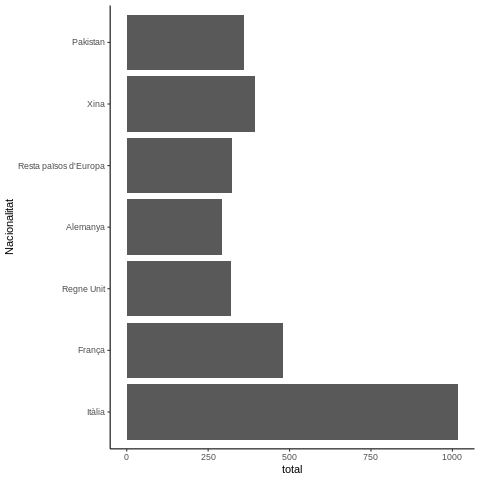

In [29]:
%%R

# Third, plot a horizontal bar chart of the population counted by 'Nacionalitat',
# but only plot the most populous nationalities. Set a cutoff that looks right to you. 

ggplot(filter(poblenou, total >= 250), aes(x = Nacionalitat, y = total)) + 
geom_col() + coord_flip() + theme_classic()

# Note: the number of each 'Sexe'/'Nacionalitat' combo is in the variable 'Nombre'
# 
# Hint: group and count manually, and then use ggplot's geom_col and use coord_flip()
# to make the chart horizontal
#
# Bonus: Display the gender ('Sexe') in different colors, via the "fill" property!

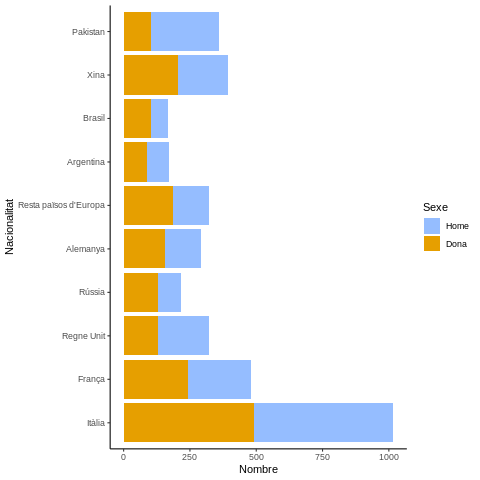

In [54]:
%%R

top_nac <- poblenou %>% arrange(desc(total)) %>% slice(1:10) %>% .$Nacionalitat

poblenou2 <- barris %>% 
    filter(Nom_Barri == 'el Poblenou' & Nacionalitat != 'Espanya' & Nacionalitat %in% top_nac) %>% 
    group_by(Nacionalitat, Sexe) 

ggplot(poblenou2, aes(x = Nacionalitat, y = Nombre, fill = Sexe)) + 
geom_col() + coord_flip() + scale_fill_manual(values=c("#95BDFF", "#E69F00")) + theme_classic()

# Problem 3: Classes in Python

In [8]:
# Create a class called "RandomClassifier". 

# It's constructor should have one required parameter: 'probability'

# It should have one instance method, 'predict'

# The predict method should take one required parameter: 'x'

# The predict method should then randomly return a 1 or 0. It should return a 1
# with the probability given in the parameter

# The following cell has a test that should pass if you've done it correctly!
import numpy as np

class RandomClassifier():
    def __init__(self, probability):
        self.probability = probability
        
    def predict(self, x):
        return np.random.binomial(1,self.probability)

In [9]:
np.random.binomial(1,0.9)

1

In [13]:
r = RandomClassifier(probability = .2)
r.predict(5)

0

In [23]:
r = RandomClassifier(probability = .2)
m = np.mean([r.predict(x = i) for i in np.arange(100000)])
print(m)

np.testing.assert_approx_equal(m, 0.2, 2)

0.0008999999999999841


# Problem 4: Some Theory

### What are pure functions and what are their strengths? (2-3 lines)

### What is lazy evaluation and when might you use it? (2-3 lines)